In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
from scipy import linalg
from scipy.interpolate import interp1d

In [2]:
model_name = 'redmagic_chi6_1e-02_HBT' #'redmagic_chi2_6e-03_HBT'
#rich_name = 'q180_bg_miscen'
rich_name = 'd90_bg_miscen'
redshift = 0.3

/cosma8/data/do012/dc-wu5/cylinder/output_L1000N3600/HYDRO_FIDUCIAL/z0.3/model_redmagic_chi6_1e-02_HBT/obs_d90_bg_miscen_desy1/
len(rp_rad) =  11
/cosma8/data/do012/dc-wu5/cylinder/output_L1000N3600/HYDRO_FIDUCIAL/z0.3/model_redmagic_chi6_1e-02_HBT/obs_d90_bg_miscen_desy1/
len(rp_rad) =  11


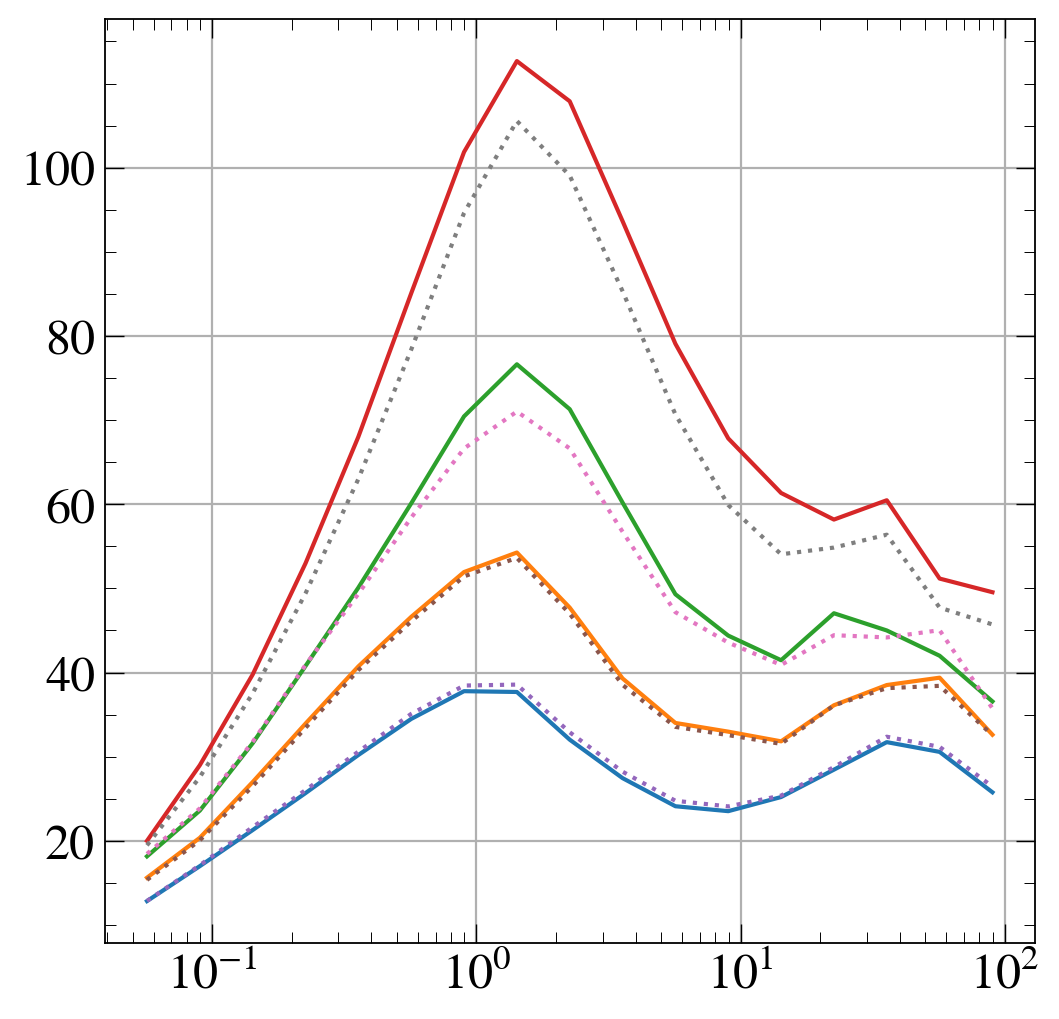

In [3]:
## make the data vector for MCMC
for binning in ['lam','abun']: # 

    output_loc = '/cosma8/data/do012/dc-wu5/cylinder/output_L1000N3600/HYDRO_FIDUCIAL/'
    output_loc += f'z{redshift}/model_{model_name}/' 
    data_loc = output_loc + f'obs_{rich_name}_desy1/'
    print(data_loc)
    
    rp_list = np.logspace(np.log10(0.03), np.log10(30), 15+1)
    rpmin_list = rp_list[:-1]
    rpmax_list = rp_list[1:]
    rpmid_list = np.sqrt(rpmin_list*rpmax_list)
    rp_rad = rpmid_list[rpmid_list>0.2]
    print('len(rp_rad) = ', len(rp_rad))
    
    DS_data = []
    for ibin in range(4):
        rp_in, DS_in = np.loadtxt(data_loc + f'DS_phys_noh_{binning}_bin_{ibin}.dat', unpack=True)
        if binning == 'lam':
            ls = '-'
        if binning == 'abun':
            ls = ':'        
        plt.semilogx(rp_in, rp_in*DS_in, ls=ls)
        
        DS_interp = interp1d(np.log(rp_in), np.log(DS_in))
        DS_data.extend(np.exp(DS_interp(np.log(rp_rad))))
    DS_data = np.array(DS_data)
    x, x, NC_data = np.loadtxt(data_loc+'abundance.dat',unpack=True)
    
    if binning == 'abun':
        data_vec = DS_data*1.
    else:
        data_vec = np.append(NC_data, DS_data)
    
    #np.savetxt(f'data_vector_flamingo/data_vector_{rich_name}_{binning}_z{redshift}.dat', 
    #data_vec, comments='NC (4), DS (4x11)')
    
    np.savetxt(f'data_vector_flamingo/counts_{rich_name}_{binning}_z{redshift}.dat', NC_data)
    np.savetxt(f'data_vector_flamingo/lensing_{rich_name}_{binning}_z{redshift}.dat', DS_data)


In [4]:
# data_vec_summit = np.loadtxt('data_vector_abacus_summit/data_vector_z0p300.dat')
# plt.plot(data_vec_summit, label='Summit')
# plt.plot(data_vec, label='Flamingo')
# plt.yscale('log')

In [5]:
#plt.plot(data_vec/data_vec_summit,'o-', label='Flamingo/Summit')
#plt.yscale('log')